In [1]:
%load_ext watermark
%watermark -g -co -a Ashish.Dhiman -d -t -m -u 

Author: Ashish.Dhiman

Last updated: 2022-07-10 09:31:52

conda environment: rbi_pmts_data

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 21.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

Git hash: a0b8999738fcd15337859b23f76e1e1e97d85d7f



In [2]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
import matplotlib.pyplot as plt

### Of UPI/Credit Cards and Debit Cards, means mostly associated with Consumer Spending, which were the most reactive to 2nd Covid Wave in India

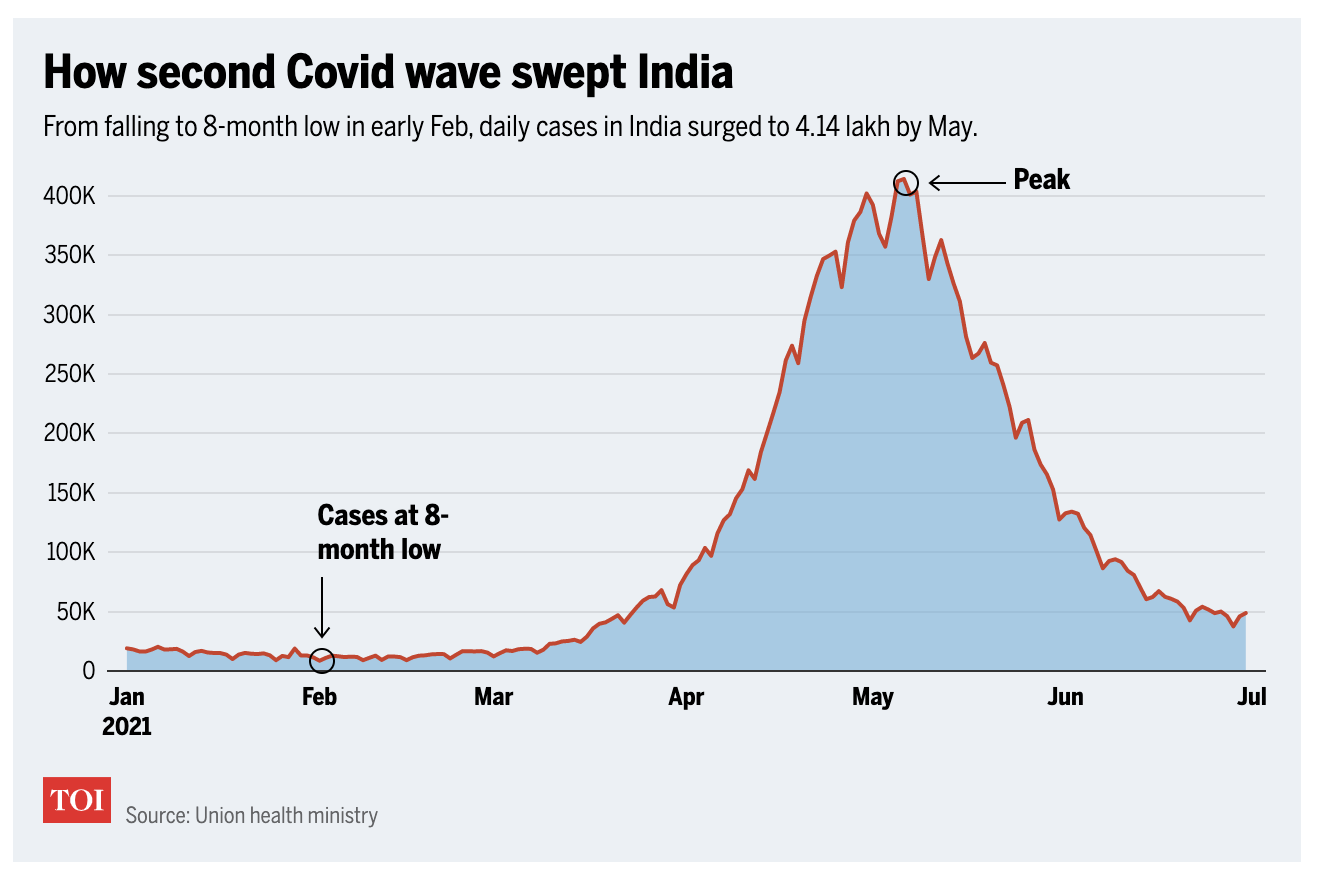

In [3]:
second_wave_start = "2021-03-15"
second_wave_end = "2021-06-15"

### Read data and clean dates

In [4]:
cleaned_pmts = pd.read_csv("../data/cleaned_data.csv",index_col=0,header=[0,1])
cleaned_pmts['Date'] = cleaned_pmts.index

for i in range(len(cleaned_pmts.index)):
    cleaned_pmts['Date'][i] = parse(cleaned_pmts.index[i])
cleaned_pmts['Date'] = pd.to_datetime(cleaned_pmts['Date'])

cleaned_pmts["mon"] = cleaned_pmts.Date.dt.month
cleaned_pmts["year"] = cleaned_pmts.Date.dt.year

/Users/ashish1610dhiman/opt/anaconda3/envs/rbi_pmts_data/lib/python3.7/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [5]:
second_wave_filter = (cleaned_pmts["Date"]>=second_wave_start) & (cleaned_pmts["Date"]<=second_wave_end)
sum(second_wave_filter)

93

In [6]:
cleaned_pmts[second_wave_filter]

pmt_type              AePS       AePS (through micro-ATMs / BCs)         \
data_type              Val   Vol                             Val    Vol   
Data for the day                                                          
2021-03-15 00:00:00  15.37  0.52                          853.41  28.63   
2021-03-16 00:00:00  13.34  0.45                          749.98  25.93   
2021-03-17 00:00:00  14.31  0.47                          795.37  26.95   
2021-03-18 00:00:00  14.58  0.48                          788.60  26.84   
2021-03-19 00:00:00  15.13  0.49                          809.58  27.71   
...                    ...   ...                             ...    ...   
2021-06-11 00:00:00  15.54  0.60                          854.45  30.78   
2021-06-12 00:00:00  14.62  0.53                          784.33  28.10   
2021-06-13 00:00:00   9.39  0.37                          500.62  19.28   
2021-06-14 00:00:00  16.61  0.66                          922.66  33.27   
2021-06-15 00:00:00  17.04  0.70                          950.60  34.99   

pmt_type               BBPS              CTS         \
data_type               Val    Vol       Val    Vol   
Data for the day                                      
2021-03-15 00:00:00  228.79  15.10  19090.57  23.09   
2021-03-16 00:00:00  206.03  13.93  20814.29  25.26   
2021-03-17 00:00:00  221.30  13.92  42829.39  52.16   
2021-03-18 00:00:00  215.90  13.66   37057.8  42.32   
2021-03-19 00:00:00  203.27  12.68  33319.25  37.14   
...                     ...    ...       ...    ...   
2021-06-11 00:00:00  263.93  15.11  18273.37  20.88   
2021-06-12 00:00:00  222.53  14.15         h      h   
2021-06-13 00:00:00  163.77  11.97         h      h   
2021-06-14 00:00:00  333.36  18.94  25022.48  29.42   
2021-06-15 00:00:00  361.20  19.32  21763.49  25.24   

pmt_type            Credit Card (At PoS and e-Commerce)            ...  \
data_type                                           Val       Vol  ...   
Data for the day                                                   ...   
2021-03-15 00:00:00                         2176.141444  65.31005  ...   
2021-03-16 00:00:00                         1961.641218  49.12879  ...   
2021-03-17 00:00:00                         1770.163898  46.36823  ...   
2021-03-18 00:00:00                         1162.272953  31.70783  ...   
2021-03-19 00:00:00                         3058.627803  52.12739  ...   
...                                                 ...       ...  ...   
2021-06-11 00:00:00                         1531.080733  38.86147  ...   
2021-06-12 00:00:00                          690.330557  20.22642  ...   
2021-06-13 00:00:00                         1005.907109  31.73194  ...   
2021-06-14 00:00:00                         2746.862188  65.16756  ...   
2021-06-15 00:00:00                         1542.427838  36.15709  ...   

pmt_type            Prepaid Payment Instruments (PPIs) Card at e-Commerce  \
data_type                                                             Vol   
Data for the day                                                            
2021-03-15 00:00:00                                                NaN      
2021-03-16 00:00:00                                                NaN      
2021-03-17 00:00:00                                                NaN      
2021-03-18 00:00:00                                                NaN      
2021-03-19 00:00:00                                                NaN      
...                                                                ...      
2021-06-11 00:00:00                                                NaN      
2021-06-12 00:00:00                                                NaN      
2021-06-13 00:00:00                                                NaN      
2021-06-14 00:00:00                                                NaN      
2021-06-15 00:00:00                                                NaN      

pmt_type                           RTGS            \
data_type

In [7]:
subset_cols = [x for x in cleaned_pmts.columns if any([z in x[0] for z in \
                                                       ["Card", "UPI","NFS", "Date", "mon", "year"]])]
subset_cols

[('Credit Card (At PoS and e-Commerce)', 'Val'),
 ('Credit Card (At PoS and e-Commerce)', 'Vol'),
 ('Credit Card at PoS', 'Val'),
 ('Credit Card at PoS', 'Vol'),
 ('Credit Card at e-Commerce', 'Val'),
 ('Credit Card at e-Commerce', 'Vol'),
 ('Debit Card (At PoS and e-Commerce)', 'Val'),
 ('Debit Card (At PoS and e-Commerce)', 'Vol'),
 ('Debit Card at PoS', 'Val'),
 ('Debit Card at PoS', 'Vol'),
 ('Debit Card at e-Commerce', 'Val'),
 ('Debit Card at e-Commerce', 'Vol'),
 ('NFS (through ATMs)', 'Val'),
 ('NFS (through ATMs)', 'Vol'),
 ('Prepaid Payment Instruments (PPIs) Card (At PoS and e-Commerce)', 'Val'),
 ('Prepaid Payment Instruments (PPIs) Card (At PoS and e-Commerce)', 'Vol'),
 ('Prepaid Payment Instruments (PPIs) Card at PoS', 'Val'),
 ('Prepaid Payment Instruments (PPIs) Card at PoS', 'Vol'),
 ('Prepaid Payment Instruments (PPIs) Card at e-Commerce', 'Val'),
 ('Prepaid Payment Instruments (PPIs) Card at e-Commerce', 'Vol'),
 ('UPI', 'Val'),
 ('UPI', 'Vol'),
 ('Date', ''),
 ('mo

In [8]:
df0 = cleaned_pmts[subset_cols]

In [9]:
df0.shape

(760, 25)

In [10]:
df0

pmt_type         Credit Card (At PoS and e-Commerce)     Credit Card at PoS  \
data_type                                        Val Vol                Val   
Data for the day                                                              
June 1, 2020                                     NaN NaN                NaN   
June 2, 2020                                     NaN NaN                NaN   
June 3, 2020                                     NaN NaN                NaN   
June 4, 2020                                     NaN NaN                NaN   
June 5, 2020                                     NaN NaN                NaN   
...                                              ...  ..                ...   
July 27, 2020                                    NaN NaN                NaN   
July 28, 2020                                    NaN NaN                NaN   
July 29, 2020                                    NaN NaN                NaN   
July 30, 2020                                    NaN NaN                NaN   
July 31, 2020                                    NaN NaN                NaN   

pmt_type             Credit Card at e-Commerce      \
data_type        Vol                       Val Vol   
Data for the day                                     
June 1, 2020     NaN                       NaN NaN   
June 2, 2020     NaN                       NaN NaN   
June 3, 2020     NaN                       NaN NaN   
June 4, 2020     NaN                       NaN NaN   
June 5, 2020     NaN                       NaN NaN   
...               ..                       ...  ..   
July 27, 2020    NaN                       NaN NaN   
July 28, 2020    NaN                       NaN NaN   
July 29, 2020    NaN                       NaN NaN   
July 30, 2020    NaN                       NaN NaN   
July 31, 2020    NaN                       NaN NaN   

pmt_type         Debit Card (At PoS and e-Commerce)     Debit Card at PoS      \
data_type                                       Val Vol               Val Vol   
Data for the day                                                                
June 1, 2020                                    NaN NaN               NaN NaN   
June 2, 2020                                    NaN NaN               NaN NaN   
June 3, 2020                                    NaN NaN               NaN NaN   
June 4, 2020                                    NaN NaN               NaN NaN   
June 5, 2020                                    NaN NaN               NaN NaN   
...                                             ...  ..               ...  ..   
July 27, 2020                                   NaN NaN               NaN NaN   
July 28, 2020                                   NaN NaN               NaN NaN   
July 29, 2020                                   NaN NaN               NaN NaN   
July 30, 2020                                   NaN NaN               NaN NaN   
July 31, 2020                                   NaN NaN               NaN NaN   

pmt_type          ...  \
data_type         ...   
Data for the day  ...   
June 1, 2020      ...   
June 2, 2020      ...   
June 3, 2020      ...   
June 4, 2020      ...   
June 5, 2020      ...   
...               ...   
July 27, 2020     ...   
July 28, 2020     ...   
July 29, 2020     ...   
July 30, 2020     ...   
July 31, 2020     ...   

pmt_type         Prepaid Payment Instruments (PPIs) Card (At PoS and e-Commerce)  \
data_type                                                                    Vol   
Data for the day                                                                   
June 1, 2020                                                    NaN                
June 2, 2020                                                    NaN                
June 3, 2020                                                    NaN                
June 4, 2020                                                    NaN                
June 5, 2020                                                  

#### Clean Credit card etc columns

In [11]:
df0[("credit_card_pos_ecom_ad","Val")] = df0[[('Credit Card (At PoS and e-Commerce)', 'Val'),\
                                            ('Credit Card at PoS', 'Val'),\
                                            ('Credit Card at e-Commerce', 'Val')]].fillna(0).sum(axis=1)

df0[("credit_card_pos_ecom_ad","Vol")] = df0[[('Credit Card (At PoS and e-Commerce)', 'Vol'),\
                                            ('Credit Card at PoS', 'Vol'),\
                                            ('Credit Card at e-Commerce', 'Vol')]].fillna(0).sum(axis=1)

df0[[("credit_card_pos_ecom_ad","Val"),('Credit Card (At PoS and e-Commerce)', 'Val'),\
   ('Credit Card at PoS', 'Val') , ('Credit Card at e-Commerce', 'Val')]]

/Users/ashish1610dhiman/opt/anaconda3/envs/rbi_pmts_data/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ashish1610dhiman/opt/anaconda3/envs/rbi_pmts_data/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


pmt_type,credit_card_pos_ecom_ad,Credit Card (At PoS and e-Commerce),Credit Card at PoS,Credit Card at e-Commerce
data_type,Val,Val,Val,Val
Data for the day,,,,
"June 1, 2020",0.0,NaN,NaN,NaN
"June 2, 2020",0.0,NaN,NaN,NaN
"June 3, 2020",0.0,NaN,NaN,NaN
"June 4, 2020",0.0,NaN,NaN,NaN
"June 5, 2020",0.0,NaN,NaN,NaN
...,...,...,...,...
"July 27, 2020",0.0,NaN,NaN,NaN
"July 28, 2020",0.0,NaN,NaN,NaN


In [12]:
df0[("debit_card_pos_ecom_ad","Val")] = df0[[('Debit Card (At PoS and e-Commerce)', 'Val'),\
                                            ('Debit Card at PoS', 'Val'),\
                                            ('Debit Card at e-Commerce', 'Val')]].fillna(0).sum(axis=1)

df0[("debit_card_pos_ecom_ad","Vol")] = df0[[('Debit Card (At PoS and e-Commerce)', 'Vol'),\
                                            ('Debit Card at PoS', 'Vol'),\
                                            ('Debit Card at e-Commerce', 'Vol')]].fillna(0).sum(axis=1)

/Users/ashish1610dhiman/opt/anaconda3/envs/rbi_pmts_data/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ashish1610dhiman/opt/anaconda3/envs/rbi_pmts_data/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [13]:
df0[("prepaid_card_pos_ecom_ad","Val")] = df0[[('Prepaid Payment Instruments (PPIs) Card (At PoS and e-Commerce)', 'Val'),\
                                            ('Prepaid Payment Instruments (PPIs) Card at PoS', 'Val'),\
                                            ('Prepaid Payment Instruments (PPIs) Card at e-Commerce', 'Val')]].fillna(0).sum(axis=1)

df0[("prepaid_card_pos_ecom_ad","Vol")] = df0[[('Prepaid Payment Instruments (PPIs) Card (At PoS and e-Commerce)', 'Vol'),\
                                            ('Prepaid Payment Instruments (PPIs) Card at PoS', 'Vol'),\
                                            ('Prepaid Payment Instruments (PPIs) Card at e-Commerce', 'Vol')]].fillna(0).sum(axis=1)

/Users/ashish1610dhiman/opt/anaconda3/envs/rbi_pmts_data/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ashish1610dhiman/opt/anaconda3/envs/rbi_pmts_data/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### Plots and check

In [14]:
agg_cols = [x for x in df0.columns if "ad" in x[0] or "UPI" in x]
agg_cols

[('UPI', 'Val'),
 ('UPI', 'Vol'),
 ('credit_card_pos_ecom_ad', 'Val'),
 ('credit_card_pos_ecom_ad', 'Vol'),
 ('debit_card_pos_ecom_ad', 'Val'),
 ('debit_card_pos_ecom_ad', 'Vol'),
 ('prepaid_card_pos_ecom_ad', 'Val'),
 ('prepaid_card_pos_ecom_ad', 'Vol')]

In [15]:
monthly_total_pmts = df0.groupby(by=[df0["Date"].dt.year,df0["Date"].dt.month]\
                    )[agg_cols].sum()
monthly_total_pmts

pmt_type            UPI              credit_card_pos_ecom_ad              \
data_type           Val          Vol                     Val         Vol   
Date Date                                                                  
2020 6     2.618355e+05  13369.34707                0.000000     0.00000   
     7     2.905379e+05  14973.54000                0.000000     0.00000   
     8     2.983076e+05  16188.27000                0.000000     0.00000   
     9     3.290318e+05  18001.67000                0.000000     0.00000   
     10    3.861067e+05  20716.19000                0.000000     0.00000   
     11    3.909992e+05  22102.28636            43629.831015  1414.87618   
     12    4.161762e+05  22341.58091            46191.731017  1421.42800   
2021 1     4.311819e+05  23027.28000            45029.145099  1270.88251   
     2     4.250628e+05  22928.94000            42620.084615  1201.96999   
     3     5.048865e+05  27316.85000            52895.436805  1388.82030   
     4     4.936637e+05  26410.61000            41521.293230  1143.33103   
     5     4.891056e+05  25291.82000            39303.267248   980.61906   
     6     5.473732e+05  28075.16000            47799.497788  1152.76569   
     7     6.058832e+05  32455.01925            55942.929699  1349.45190   
     8     6.391169e+05  35555.45000            60690.833912  1465.16596   
     9     6.546483e+05  36558.17000            62936.714587  1411.39837   
     10    7.714070e+05  42184.32000            76274.045425  1613.89371   
     11    7.684361e+05  41864.80000            72581.706849  1586.25615   
     12    8.268482e+05  45662.99000            75793.248549  1641.84844   
2022 1     8.319931e+05  46171.56000            71573.793780  1508.39035   
     2     8.268430e+05  45274.89000            69113.184546  1470.15666   
     3     9.605817e+05  54056.51000            84622.242275  1748.91404   
     4     9.835734e+05  55843.88000            81363.643431  1734.27419   
     5     1.040221e+06  59462.89000            89604.388284  1881.81694   
     6     1.014413e+06  58629.08000            84434.616850  1807.18455   

pmt_type  debit_card_pos_ecom_ad             prepaid_card_pos_ecom_ad  \
data_type                    Val         Vol                      Val   
Date Date                                                               
2020 6                  0.000000     0.00000                 0.000000   
     7                  0.000000     0.00000                 0.000000   
     8                  0.000000     0.00000                 0.000000   
     9                  0.000000     0.00000                 0.000000   
     10                 0.000000     0.00000                 0.000000   
     11             54615.077293  3489.68054              2712.897005   
     12             54260.590100  3362.76472              3315.100756   
2021 1              51261.179157  3045.38851              4513.138375   
     2              48532.674407  2845.11099              4418.846159   
     3              56858.125056  3143.79813              5434.972596   
     4              45970.329838  2631.94947              6888.811778   
     5              35323.821632  2104.01486              6020.699773   
     6              41607.909845  2403.94040              1752.724677   
     7              49802.652955  2800.43833              2667.201330   
     8              54203.890285  3002.98017              3325.917123   
     9              51701.001043  2894.32290              2967.975233   
     10             61415.713175  3178.51289              2537.608786   
     11             57236.500500  3007.97961              3023.024736   
     12             55056.013897  2999.80656              4071.476741   
2022 1              50260.377495  2765.44653              4370.913115   
     2              48128.936509  2586.49911              4201.910088   
     3              53644.150266  2852.52176              4180.093177   
     4              53856.726885  2836.87768  

In [17]:
monthly_total_pmts_ma = monthly_total_pmts.rolling(window=3).mean()

In [18]:
val_cols = [x for x in monthly_total_pmts.columns if x[1] == "Val"]
vol_cols = [x for x in monthly_total_pmts.columns if x[1] == "Vol"]

In [19]:
monthly_total_pmts.index

MultiIndex([(2020,  6),
            (2020,  7),
            (2020,  8),
            (2020,  9),
            (2020, 10),
            (2020, 11),
            (2020, 12),
            (2021,  1),
            (2021,  2),
            (2021,  3),
            (2021,  4),
            (2021,  5),
            (2021,  6),
            (2021,  7),
            (2021,  8),
            (2021,  9),
            (2021, 10),
            (2021, 11),
            (2021, 12),
            (2022,  1),
            (2022,  2),
            (2022,  3),
            (2022,  4),
            (2022,  5),
            (2022,  6)],
           names=['Date', 'Date'])

In [20]:
val_cols

[('UPI', 'Val'),
 ('credit_card_pos_ecom_ad', 'Val'),
 ('debit_card_pos_ecom_ad', 'Val'),
 ('prepaid_card_pos_ecom_ad', 'Val')]

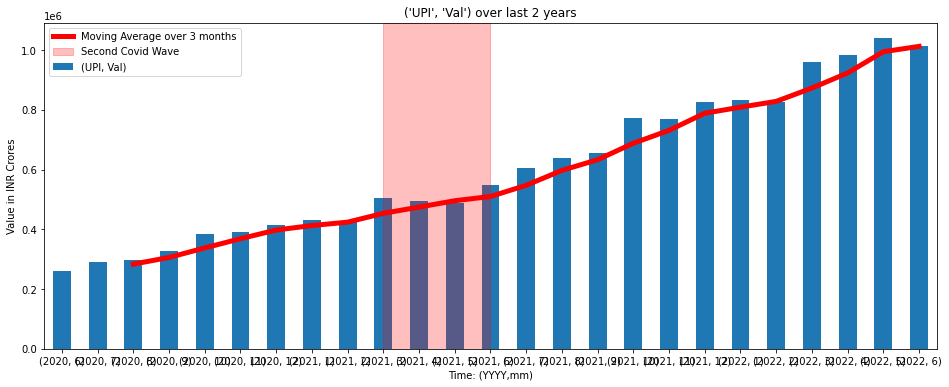

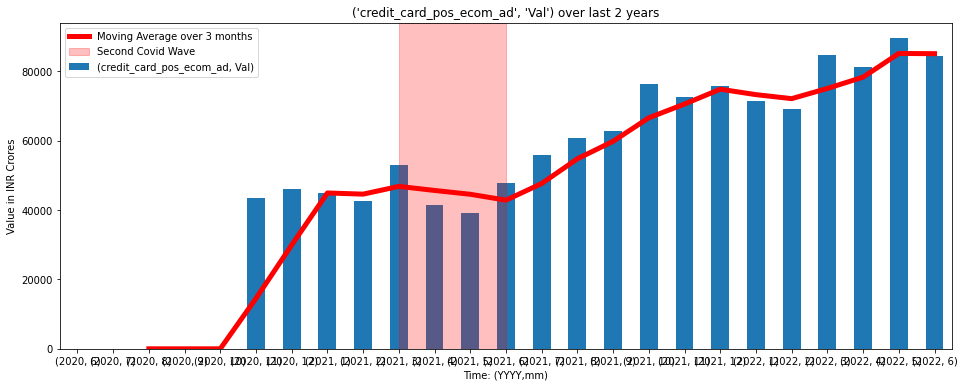

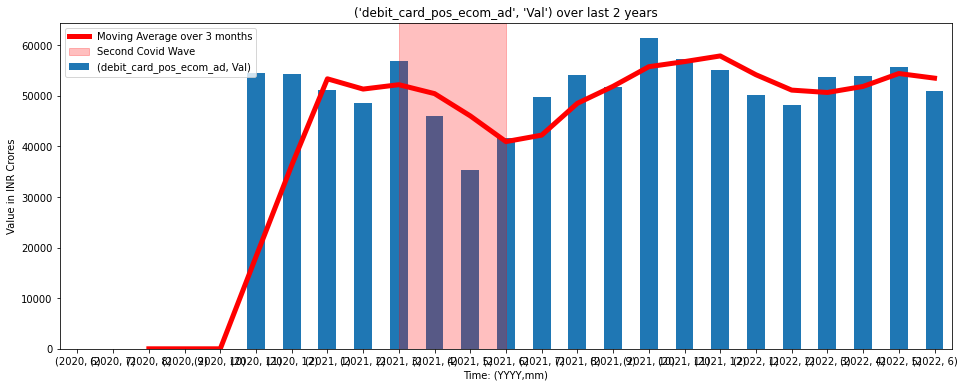

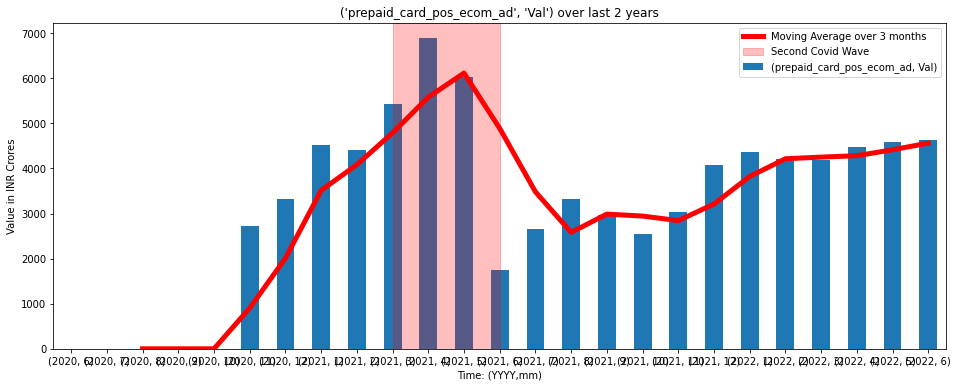

In [26]:
for col_i in val_cols:
    ax = monthly_total_pmts[col_i].plot(kind = "bar", figsize=(16,6), title = f"{col_i} over last 2 years")
    monthly_total_pmts_ma[col_i].plot(color = "red", lw = 5, label = "Moving Average over 3 months")
    ax.set_ylabel("Value in INR Crores")
    ax.set_xlabel("Time: (YYYY,mm)")
    ax.axvspan(9,12,alpha = 0.25,color = "red", label = "Second Covid Wave")
    ax.legend()
    plt.show()

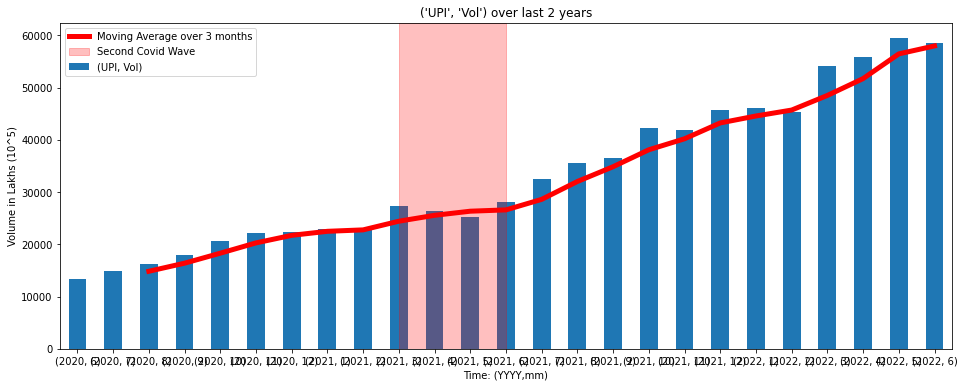

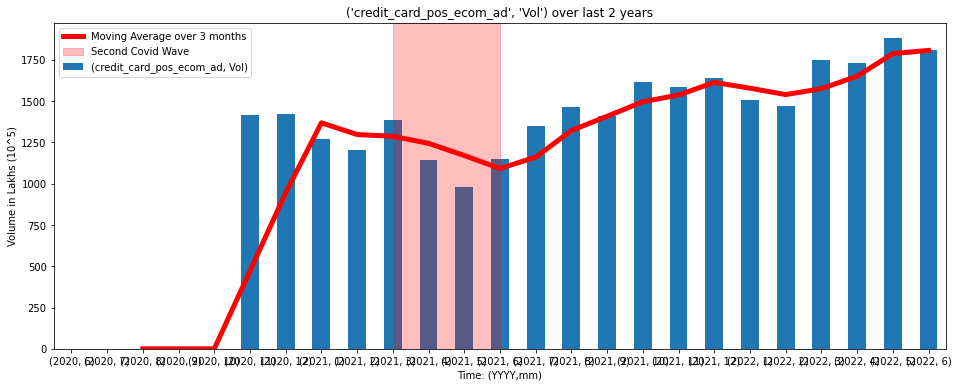

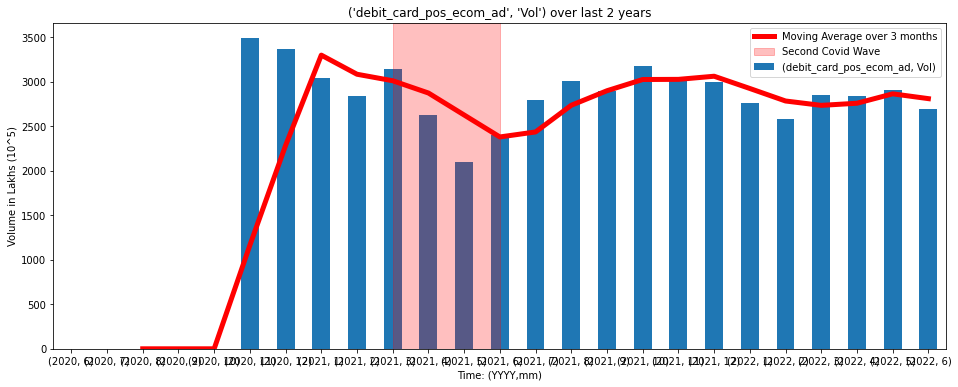

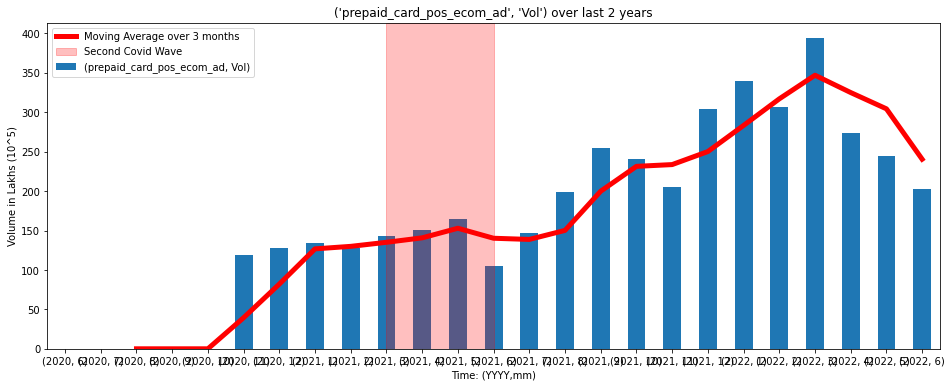

In [27]:
for col_i in vol_cols:
    ax = monthly_total_pmts[col_i].plot(kind = "bar", figsize=(16,6), title = f"{col_i} over last 2 years")
    monthly_total_pmts_ma[col_i].plot(color = "red", lw = 5, label = "Moving Average over 3 months")
    ax.set_ylabel("Volume in Lakhs (10^5)")
    ax.set_xlabel("Time: (YYYY,mm)")
    ax.axvspan(9,12,alpha = 0.25,color = "red", label = "Second Covid Wave")
    ax.legend()
    plt.show()

Trends conciding with second covid wave from above graphs can be summarised as follows:
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-8bgf{border-color:inherit;font-style:italic;text-align:center;vertical-align:top}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-k7ar{background-color:#c0c0c0;border-color:#000000;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-dlt1{background-color:#fe996b;text-align:center;vertical-align:top}
.tg .tg-ifcm{background-color:#ffce93;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt" rowspan="2">Pmt Method</th>
    <th class="tg-k7ar" colspan="2">Trend</th>
  </tr>
  <tr>
    <th class="tg-8bgf">Value</th>
    <th class="tg-8bgf">Volume</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">UPI</td>
    <td class="tg-c3ow">Slight dip/ stagnation</td>
    <td class="tg-c3ow">Slight dip/ stagnation</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Credit Cards</td>
    <td class="tg-c3ow">Significant Dip</td>
    <td class="tg-c3ow">Significant Dip</td>
  </tr>
  <tr>
    <td class="tg-baqh">Debit Cards</td>
    <td class="tg-baqh">Big Dip</td>
    <td class="tg-baqh">Big Dip</td>
  </tr>
  <tr>
    <td class="tg-baqh">Prepaid Cards</td>
    <td class="tg-dlt1">Postivie Growth</td>
    <td class="tg-ifcm">Slight Growth</td>
  </tr>
</tbody>
</table>

### Lets's try and formaise these observations mathematically.
We shall employ two methods for the same:
* Method 1: This method is rudimentary method based on %delta in the given period
* Method 2: Basis Anomaly detection

*Because Value and Volume metrics are more or less in sync, we will restrict scope of further analysis to only Value**

### Method 1
Calculate %delta as = [value at Peak of second wave, i.e May 2021/ value at start, i.e Mar 2021] - 1

These are in sync with our manual observations

In [28]:
for col_i in vol_cols:
    delta_col = (monthly_total_pmts[col_i].loc[(2021,5)]/monthly_total_pmts[col_i].loc[(2021,3)]) - 1
    print (f"Delta for {col_i[0]} during second wave = \x1b[31m{delta_col:.1%}\x1b[0m")

Delta for UPI during second wave = -7.4%
Delta for credit_card_pos_ecom_ad during second wave = -29.4%
Delta for debit_card_pos_ecom_ad during second wave = -33.1%
Delta for prepaid_card_pos_ecom_ad during second wave = 14.7%


### Method 2: Anomaly detection
1. Interquartile Range
 - Calculate IQR which is the difference between 75th (Q3)and 25th (Q1) percentiles.
 - Calculate upper and lower bounds for the outlier.
 - Filter the data points that fall outside the upper and lower bounds and flag them as outliers.

In [30]:
monthly_total_pmts.quantile([0.25, 0.75])

pmt_type             UPI              credit_card_pos_ecom_ad              \
data_type            Val          Vol                     Val         Vol   
0.25       416176.224475  22341.58091            41521.293230  1143.33103   
0.75       826843.020000  45274.89000            72581.706849  1586.25615   

pmt_type  debit_card_pos_ecom_ad             prepaid_card_pos_ecom_ad  \
data_type                    Val         Vol                      Val   
0.25                41607.909845  2403.94040              2537.608786   
0.75                54260.590100  3002.98017              4465.405657   

pmt_type              
data_type        Vol  
0.25       118.37225  
0.75       244.83781

In [33]:
# Calculate IQR
quantile_df = monthly_total_pmts.quantile([0.25, 0.75])
iqr_df = quantile_df.loc[0.75] - quantile_df.loc[0.25]
iqr_df

pmt_type                  data_type
UPI                       Val          410666.795525
                          Vol           22933.309090
credit_card_pos_ecom_ad   Val           31060.413619
                          Vol             442.925120
debit_card_pos_ecom_ad    Val           12652.680255
                          Vol             599.039770
prepaid_card_pos_ecom_ad  Val            1927.796870
                          Vol             126.465560
dtype: float64

In [35]:
quantile_df.loc[0.25] - iqr_df*1.5

pmt_type                  data_type
UPI                       Val         -199823.968813
                          Vol          -12058.382725
credit_card_pos_ecom_ad   Val           -5069.327198
                          Vol             478.943350
debit_card_pos_ecom_ad    Val           22628.889463
                          Vol            1505.380745
prepaid_card_pos_ecom_ad  Val            -354.086519
                          Vol             -71.326090
dtype: float64